<h1>Restaurant Location Recommendation</h1>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

 <h3>Introduction: Business Problem</h3> <a class="anchor" id="introduction"></a>

<h4>1.1	Background</h4>

Location analysis is a technique for finding the best location for your new restaurant. So, choosing a good location for your business might be the single most effective thing you can do to succeed. There are many factors to consider when performing a location analysis and looking for a good location for your new restaurant, such as accessibility, zoning, crime rates, and local demographics. Performing a location analysis can help you find the best spot for your business, ensuring that your new business starts off on the right foot.

<h4>1.2	Business Problem</h4>

We need data that might help us in deciding the location for your new restaurant so that it starts off on the right foot. This project aims to predict the location best fit for a particular kind of restaurant.


<h3>Data</h3><a class="anchor" id="data"></a>

<h4>2.1 Data Sources</h4>

*	I am using the Delhi Neighbourhood dataset from Kaggle to get the different city locations along with its latitude and longitude.
*	I am using Delhi Metro dataset from Kaggle to know about the accessibility for a location.
*	Using Foursquare API to know about the different venues available for a location. 


Let's import the dependencies 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !pip install folium==0.5 # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import seaborn as sns

print('Libraries imported.')

Libraries imported.


<h4>Importing the dataset</h4>

In [2]:
#Delhi Neighborhood dataset
delhi_neigh = pd.read_excel(r'C:\Users\user\Downloads\Delhi Neighbourhood\Delhi_Neigh_LatLong.xlsx')
delhi_neigh

District           Neighborhood   Latitude  Longitude
0    North West Delhi           Adarsh Nagar  28.719390  77.173270
1    North West Delhi            Ashok Vihar  28.687260  77.177689
2    North West Delhi                Azadpur  28.712997  77.177360
3    North West Delhi                 Bawana  28.797247  77.048331
4    North West Delhi              Begum Pur  28.726457  77.064246
5    North West Delhi                  Dhaka  28.708699  77.206372
6    North West Delhi           Jahangirpuri  28.728572  77.167817
7    North West Delhi                 Karala  28.734176  77.032893
8    North West Delhi           Keshav Puram  28.688848  77.161600
9    North West Delhi          Kingsway Camp  28.697526  77.194712
10   North West Delhi          Kohat Enclave  28.696182  77.139353
11   North West Delhi             Model Town  28.709013  77.191216
12   North West Delhi                 Narela  28.846118  77.095689
13   North West Delhi             Pitam Pura  28.698369  77.135658
14   North West Delhi              Rani Bagh  28.687675  77.134546
15   North West Delhi                Rithala  28.719661  77.103003
16   North West Delhi        Rohini Sub City  28.735668  77.096024
17   North West Delhi          Shalimar Bagh  28.715211  77.157412
18        North Delhi          Chawri Bazaar  28.648213  77.227038
19        North Delhi            Civil Lines  28.678839  77.224993
20        North Delhi           Dariba Kalan  28.655433  77.233997
21        North Delhi             Ghantewala  28.676281  77.203235
22        North Delhi            Gulabi Bagh  28.670702  77.193551
23        North Delhi            Kamla Nagar  28.680739  77.203835
24        North Delhi          Kashmiri Gate  28.666552  77.229207
25        North Delhi                Kotwali  28.658561  77.231308
26        North Delhi            Lahori Gate  28.656701  77.218332
27        North Delhi            Nehru Vihar  28.710974  77.221635
28        North Delhi           Pratap Nagar  28.666309  77.198723
29        North Delhi            Pul Bangash  28.666848  77.208163
30        North Delhi         Roshanara Bagh  28.669573  77.206353
31        North Delhi           Sadar Bazaar  28.657814  77.212911
32        North Delhi             Sant Nagar  28.554899  77.249550
33        North Delhi        Sarai Kale Khan  28.588683  77.260806
34        North Delhi          Sarai Rohilla  28.665243  77.186973
35        North Delhi           Shakti Nagar  28.680371  77.198164
36        North Delhi             Tis Hazari  28.664922  77.213692
37        North Delhi               Timarpur  28.700666  77.221082
38        North Delhi              Wazirabad  28.728819  77.220738
39   North East Delhi               Babarpur  28.686653  77.282939
40   North East Delhi         Dilshad Garden  28.684212  77.315252
41   North East Delhi            Kabir Nagar  28.692489  77.282127
42   North East Delhi                Mandoli  28.704304  77.315589
43   North East Delhi                Maujpur  28.691607  77.275407
44   North East Delhi        Mukherjee Nagar  28.709839  77.208569
45   North East Delhi             Nand Nagri  28.694671  77.307304
46   North East Delhi        Naveen Shahdara  28.676641  77.284242
47   North East Delhi           New Usmanpur  28.681309  77.260373
48   North East Delhi               Sadatpur  28.724789  77.267255
49   North East Delhi            Sonia Vihar  28.737331  77.248810
50   North East Delhi           Shastri Park  28.669656  77.254261
51   North East Delhi           Yamuna Vihar  28.699623  77.274579
52      Central Delhi          Chandni Chowk  28.650282  77.230264
53      Central Delhi              Daryaganj  28.645586  77.241528
54      Central Delhi            Jhandewalan  28.647113  77.203323
55      Central Delhi             Karol Bagh  28.653982  77.186884
56      Central Delhi         Bara Hindu Rao  28.661473  77.204182
57      Central Delhi              Paharganj  28.644640  77.214180
58      Central Delhi         Rajender Nagar  28.639819  77.

In [3]:
#Delhi Restaurant dataset
restaurant = pd.read_csv(r'C:\Users\user\Downloads\Delhi Neighbourhood\restaurant_dataSet.csv')
restaurant

Unnamed: 0        Neighborhood  Neighborhood Latitude  \
0             0        Adarsh Nagar              28.614193   
1             1        Adarsh Nagar              28.614193   
2             2        Adarsh Nagar              28.614193   
3             3        Adarsh Nagar              28.614193   
4             4         Ashok Vihar              28.699453   
5             5         Ashok Vihar              28.699453   
6             6         Ashok Vihar              28.699453   
7             7         Ashok Vihar              28.699453   
8             8             Azadpur              28.707657   
9             9             Azadpur              28.707657   
10           10             Azadpur              28.707657   
11           11             Azadpur              28.707657   
12           12        Keshav Puram              28.688926   
13           13        Keshav Puram              28.688926   
14           14        Keshav Puram              28.688926   
15           15        Keshav Puram              28.688926   
16           16        Keshav Puram              28.688926   
17           17       Kohat Enclave              28.698041   
18           18       Kohat Enclave              28.698041   
19           19       Kohat Enclave              28.698041   
20           20       Kohat Enclave              28.698041   
21           21       Kohat Enclave              28.698041   
22           22       Kohat Enclave              28.698041   
23           23       Kohat Enclave              28.698041   
24           24       Kohat Enclave              28.698041   
25           25          Pitam Pura              28.703268   
26           26          Pitam Pura              28.703268   
27           27          Pitam Pura              28.703268   
28           28          Pitam Pura              28.703268   
29           29           Rani Bagh              28.685982   
30           30           Rani Bagh              28.685982   
31           31           Rani Bagh              28.685982   
32           32           Rani Bagh              28.685982   
33           33             Rithala              28.720806   
34           34        Shakti Nagar              28.679790   
35           35        Shakti Nagar              28.679790   
36           36        Shakti Nagar              28.679790   
37           37        Shakti Nagar              28.679790   
38           38      Bara Hindu Rao              28.659518   
39           39      Bara Hindu Rao              28.659518   
40           40      Bara Hindu Rao              28.659518   
41           41      Bara Hindu Rao              28.659518   
42           42       Chandni Chowk              28.643483   
43           43       Chandni Chowk              28.643483   
44           44       Chandni Chowk              28.643483   
45           45       Chandni Chowk              28.643483   
46           46       Chawri Bazaar              28.649927   
47           47       Chawri Bazaar              28.649927   
48           48       Chawri Bazaar              28.649927   
49           49       Chawri Bazaar              28.649927   
50           50       Chawri Bazaar              28.649927   
51           51         Civil Lines              28.676857   
52           52         Civil Lines              28.676857   
53           53         Civil Lines              28.676857   
54           54         Civil Lines              28.676857   
55           55         Civil Lines              28.676857   
56           56         Civil Lines              28.676857   
57           57        Dariba Kalan              28.654602   
58           58        Dariba Kalan              28.654602   
59           59        Dariba Kalan              28.654602   
60           60        Dariba Kalan              28.654602   
61           61        Dariba Kalan              28.654602   
62           62        Dariba Kalan              28.654602   
63           63        Dariba Kalan  

In [4]:
restaurant.rename(columns = {'Venue Latitude':'Latitude', 'Venue Longitude':'Longitude', 'Neighborhood':'Neighborhood', 'Venue Category':'Category'}, inplace = True)
restaurant

Unnamed: 0        Neighborhood  Neighborhood Latitude  \
0             0        Adarsh Nagar              28.614193   
1             1        Adarsh Nagar              28.614193   
2             2        Adarsh Nagar              28.614193   
3             3        Adarsh Nagar              28.614193   
4             4         Ashok Vihar              28.699453   
5             5         Ashok Vihar              28.699453   
6             6         Ashok Vihar              28.699453   
7             7         Ashok Vihar              28.699453   
8             8             Azadpur              28.707657   
9             9             Azadpur              28.707657   
10           10             Azadpur              28.707657   
11           11             Azadpur              28.707657   
12           12        Keshav Puram              28.688926   
13           13        Keshav Puram              28.688926   
14           14        Keshav Puram              28.688926   
15           15        Keshav Puram              28.688926   
16           16        Keshav Puram              28.688926   
17           17       Kohat Enclave              28.698041   
18           18       Kohat Enclave              28.698041   
19           19       Kohat Enclave              28.698041   
20           20       Kohat Enclave              28.698041   
21           21       Kohat Enclave              28.698041   
22           22       Kohat Enclave              28.698041   
23           23       Kohat Enclave              28.698041   
24           24       Kohat Enclave              28.698041   
25           25          Pitam Pura              28.703268   
26           26          Pitam Pura              28.703268   
27           27          Pitam Pura              28.703268   
28           28          Pitam Pura              28.703268   
29           29           Rani Bagh              28.685982   
30           30           Rani Bagh              28.685982   
31           31           Rani Bagh              28.685982   
32           32           Rani Bagh              28.685982   
33           33             Rithala              28.720806   
34           34        Shakti Nagar              28.679790   
35           35        Shakti Nagar              28.679790   
36           36        Shakti Nagar              28.679790   
37           37        Shakti Nagar              28.679790   
38           38      Bara Hindu Rao              28.659518   
39           39      Bara Hindu Rao              28.659518   
40           40      Bara Hindu Rao              28.659518   
41           41      Bara Hindu Rao              28.659518   
42           42       Chandni Chowk              28.643483   
43           43       Chandni Chowk              28.643483   
44           44       Chandni Chowk              28.643483   
45           45       Chandni Chowk              28.643483   
46           46       Chawri Bazaar              28.649927   
47           47       Chawri Bazaar              28.649927   
48           48       Chawri Bazaar              28.649927   
49           49       Chawri Bazaar              28.649927   
50           50       Chawri Bazaar              28.649927   
51           51         Civil Lines              28.676857   
52           52         Civil Lines              28.676857   
53           53         Civil Lines              28.676857   
54           54         Civil Lines              28.676857   
55           55         Civil Lines              28.676857   
56           56         Civil Lines              28.676857   
57           57        Dariba Kalan              28.654602   
58           58        Dariba Kalan              28.654602   
59           59        Dariba Kalan              28.654602   
60           60        Dariba Kalan              28.654602   
61           61        Dariba Kalan              28.654602   
62           62        Dariba Kalan              28.654602   
63           63        Dariba Kalan  

In [5]:
#Delhi metro dataset
metro = pd.read_csv(r'C:\Users\user\Downloads\Delhi Neighbourhood\DELHI_METRO_DATA.csv')
metro

Station               Line   Latitude  \
0                           Adarsh Nagar        Yellow Line  28.714401   
1                                  AIIMS        Yellow Line  28.566860   
2                             Akshardham          Blue Line  28.617842   
3                       Anand Vihar ISBT   Blue Line branch  28.646753   
4                             Arjan Garh        Yellow Line  28.480735   
5                                Arthala           Red Line  28.676999   
6                        Ashok Park Main         Green Line  28.671604   
7                                 Ashram          Pink Line  28.572423   
8                                Azadpur        Yellow Line  28.707657   
9                        Badarpur Border        Violet Line  28.490500   
10                           Badkhal Mor        Violet Line        NaN   
11                      Bahadurgarh City         Green Line  28.690785   
12                      Barakhambha Road          Blue Line  28.629768   
13                            Bata Chowk        Violet Line  28.385836   
14                    Bhikaji Cama Place          Pink Line  28.567900   
15                      Botanical Garden          Blue Line  28.563896   
16              Brigadier Hoshiyar Singh         Green Line  28.697460   
17                   Central Secretariat        Yellow Line  28.615879   
18                         Chandni Chowk        Yellow Line  28.660504   
19                          Chawri Bazar        Yellow Line  28.650160   
20                            Chhatarpur        Yellow Line  28.506724   
21                          Chirag Delhi       Magenta Line  28.538141   
22                           Civil Lines        Yellow Line  28.676851   
23             Dabri Mor-Janakpuri South       Magenta Line  28.615755   
24                         Dashrath Puri       Magenta Line  28.601875   
25                        Delhi Aerocity        Orange Line  28.548798   
26                      Delhi Cantonment          Pink Line  28.593833   
27                            Delhi Gate        Violet Line  28.639204   
28                           Dhaula Kuan        Orange Line  28.591891   
29                        Dilshad Garden           Red Line  28.675886   
30        Durgabai Deshmukh South Campus          Pink Line  28.589438   
31                                Dwarka          Blue Line  28.577191   
32                            Dwarka Mor          Blue Line  28.619310   
33                       Dwarka Sector 8          Blue Line  28.565611   
34                       Dwarka Sector 9          Blue Line  28.574272   
35                      Dwarka Sector 10          Blue Line  28.581058   
36                      Dwarka Sector 11          Blue Line  28.586447   
37                      Dwarka Sector 12          Blue Line  28.592236   
38                      Dwarka Sector 13          Blue Line  28.597009   
39                      Dwarka Sector 14          Blue Line  28.602253   
40                      Dwarka Sector 21          Blue Line  28.551838   
41                       East Azad Nagar          Pink Line  28.664696   
42     East Vinod Nagar – Mayur Vihar-II          Pink Line  28.620044   
43                       Escorts Mujesar        Violet Line  28.370234   
44                          ESI Hospital          Pink Line  28.658074   
45                                Ghevra         Green Line  28.685238   
46                              Ghitorni        Yellow Line  28.493751   
47                             Gokulpuri          Pink Line  28.702475   
48                           Golf Course          Blue Line  28.597781   
49                           Govind Puri        Violet Line  28.544377   
50                       Greater Kailash       Magenta Line  28.541878   
51                            Green Park        Yellow Line  28.558581   
52                             GTB Nagar        Yellow Line  28.698132   
53                      Guru Dronacha

In [6]:
metro = metro.dropna()
metro

Station               Line   Latitude  \
0                           Adarsh Nagar        Yellow Line  28.714401   
1                                  AIIMS        Yellow Line  28.566860   
2                             Akshardham          Blue Line  28.617842   
3                       Anand Vihar ISBT   Blue Line branch  28.646753   
4                             Arjan Garh        Yellow Line  28.480735   
5                                Arthala           Red Line  28.676999   
6                        Ashok Park Main         Green Line  28.671604   
7                                 Ashram          Pink Line  28.572423   
8                                Azadpur        Yellow Line  28.707657   
9                        Badarpur Border        Violet Line  28.490500   
11                      Bahadurgarh City         Green Line  28.690785   
12                      Barakhambha Road          Blue Line  28.629768   
13                            Bata Chowk        Violet Line  28.385836   
14                    Bhikaji Cama Place          Pink Line  28.567900   
15                      Botanical Garden          Blue Line  28.563896   
16              Brigadier Hoshiyar Singh         Green Line  28.697460   
17                   Central Secretariat        Yellow Line  28.615879   
18                         Chandni Chowk        Yellow Line  28.660504   
19                          Chawri Bazar        Yellow Line  28.650160   
20                            Chhatarpur        Yellow Line  28.506724   
21                          Chirag Delhi       Magenta Line  28.538141   
22                           Civil Lines        Yellow Line  28.676851   
23             Dabri Mor-Janakpuri South       Magenta Line  28.615755   
24                         Dashrath Puri       Magenta Line  28.601875   
25                        Delhi Aerocity        Orange Line  28.548798   
26                      Delhi Cantonment          Pink Line  28.593833   
27                            Delhi Gate        Violet Line  28.639204   
28                           Dhaula Kuan        Orange Line  28.591891   
29                        Dilshad Garden           Red Line  28.675886   
30        Durgabai Deshmukh South Campus          Pink Line  28.589438   
31                                Dwarka          Blue Line  28.577191   
32                            Dwarka Mor          Blue Line  28.619310   
33                       Dwarka Sector 8          Blue Line  28.565611   
34                       Dwarka Sector 9          Blue Line  28.574272   
35                      Dwarka Sector 10          Blue Line  28.581058   
36                      Dwarka Sector 11          Blue Line  28.586447   
37                      Dwarka Sector 12          Blue Line  28.592236   
38                      Dwarka Sector 13          Blue Line  28.597009   
39                      Dwarka Sector 14          Blue Line  28.602253   
40                      Dwarka Sector 21          Blue Line  28.551838   
41                       East Azad Nagar          Pink Line  28.664696   
42     East Vinod Nagar – Mayur Vihar-II          Pink Line  28.620044   
43                       Escorts Mujesar        Violet Line  28.370234   
44                          ESI Hospital          Pink Line  28.658074   
45                                Ghevra         Green Line  28.685238   
46                              Ghitorni        Yellow Line  28.493751   
47                             Gokulpuri          Pink Line  28.702475   
48                           Golf Course          Blue Line  28.597781   
49                           Govind Puri        Violet Line  28.544377   
50                       Greater Kailash       Magenta Line  28.541878   
51                            Green Park        Yellow Line  28.558581   
52                             GTB Nagar        Yellow Line  28.698132   
53                      Guru Dronacharya        Yellow Line  28.482021   
54                             Haider

In [7]:
#Delhi latitude & longitude
latitude = 28.7041
longitude = 77.1025

In [8]:
# create map and display it
delhi_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# display the map of Delhi
delhi_map

<h3>Methodology</h3><a class="anchor" id="methodology"></a>

* In first step we have collected the required data: location and type (category) of every restaurant around Delhi.
* Second step in our analysis will be calculation and exploration of ‘restaurant density’ and ‘metro stations’ across different areas of Delhi – we will use folium maps for that.
* In third and final step we will be clustering the neighborhoods on the basis of the restaurant data we have acquired. Clustering is a predominant algorithm of unsupervised Machine Learning. It is used to segregate data entries in cluster depending of the similarity of their attributes, calculated by using the simple formula of euclidian distance.

We can then analysis these clusters separately and use those clusters that show high trends of Indian Restaurants 


In [9]:
# instantiate a feature group for the incidents in the dataframe
delhi = folium.map.FeatureGroup()

for lat, lng, in zip(metro.Latitude, metro.Longitude):
    delhi.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(metro.Latitude)
longitudes = list(metro.Longitude)
labels = list(metro.Station)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(delhi_map)    
    

delhi_map.add_child(delhi)

In [10]:
# instantiate a feature group for the incidents in the dataframe
delhi_rest = folium.map.FeatureGroup()


for lat, lng, in zip(restaurant.Latitude, restaurant.Longitude):
    delhi_rest.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# # add pop-up text to each marker on the map
latitudes = list(restaurant.Latitude)
longitudes = list(restaurant.Longitude)
labels = list(restaurant.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label, icon=folium.Icon(color='red', icon_color='white', icon='cutlery')).add_to(delhi_map)    
    

delhi_map.add_child(delhi_rest)

In [11]:
from folium import plugins

# let's start again with a clean copy of the map of Delhi
delhi_map = folium.Map(location = [latitude, longitude], zoom_start = 10)

# instantiate a mark cluster object for the station & restaurant in the dataframe
delhi = plugins.MarkerCluster().add_to(delhi_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(metro.Latitude, metro.Longitude, metro.Station):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(delhi)
    
for lat, lng, label, in zip(restaurant.Latitude, restaurant.Longitude, restaurant.Category):
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color='red', icon_color='white', icon='cutlery'),
        popup=label,
    ).add_to(delhi)
    
# display map
delhi_map

<h3>Analysis</h3><a class="anchor" id="analysis"></a>

<h3>Using Foursquare API</h3>

In [12]:
CLIENT_ID = 'YPSRKYMH0PFVVTVGPEI32IRBAONGMUR1QIQ02XRGIOBMXMDJ' # your Foursquare ID
CLIENT_SECRET = 'JHG5SFWHUITCDTK04EA3MZ2G5LMAQ1QLYS0IS33XDDR5MDGZ' # your Foursquare Secret
VERSION = '20201202' # Foursquare API version+
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YPSRKYMH0PFVVTVGPEI32IRBAONGMUR1QIQ02XRGIOBMXMDJ
CLIENT_SECRET:JHG5SFWHUITCDTK04EA3MZ2G5LMAQ1QLYS0IS33XDDR5MDGZ


In [13]:
neighborhood_latitude = delhi_neigh.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = delhi_neigh.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = delhi_neigh.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Adarsh Nagar are 28.71939, 77.17327.


In [14]:
# type your answer here
LIMIT = 100
radius = 500
url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=YPSRKYMH0PFVVTVGPEI32IRBAONGMUR1QIQ02XRGIOBMXMDJ&client_secret=JHG5SFWHUITCDTK04EA3MZ2G5LMAQ1QLYS0IS33XDDR5MDGZ&v=20201202&ll=28.71939,77.17327&radius=500&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5feb725b54b5505151a7d9ab'},
 'response': {'headerLocation': 'North Delhi',
  'headerFullLocation': 'North Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 28.723890004500007,
    'lng': 77.17839164936072},
   'sw': {'lat': 28.714889995499995, 'lng': 77.16814835063929}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f58ad94e4b0c3218c54e252',
       'name': "Giani's",
       'location': {'lat': 28.71790025283731,
        'lng': 77.17390684948072,
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.71790025283731,
          'lng': 77.17390684948072}],
        'distance': 177,
        'cc': 'IN',
        'country': 'India',
        'formattedAddress':

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-17-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name          categories  \
0                                            Giani's      Ice Cream Shop   
1                                      My Idea Store   Mobile Phone Shop   
2                         Adarsh Nagar Metro Station  Light Rail Station   
3  Vishyavidyalaya Metro Station@Entry gate #1 n ...       Train Station   

         lat        lng  
0  28.717900  77.173907  
1  28.717487  77.170922  
2  28.716598  77.170436  
3  28.715596  77.170981

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
delhi_venues = getNearbyVenues(names=delhi_neigh['Neighborhood'],
                                   latitudes=delhi_neigh['Latitude'],
                                   longitudes=delhi_neigh['Longitude']
                                  )

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Begum Pur
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Rohini Sub City
Shalimar Bagh
Chawri Bazaar
Civil Lines
Dariba Kalan
Ghantewala
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sadar Bazaar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Tis Hazari
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Mukherjee Nagar
Nand Nagri
Naveen Shahdara
New Usmanpur
Sadatpur
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Rajender Nagar
Barakhamba Road
Chanakyapuri
Connaught Place
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Patparganj
Preet Vihar
Anand Vihar
Shakarpur
Shastri Nagar
Silampur

In [20]:
print(delhi_venues.shape)
delhi_venues.head()

(1317, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Adarsh Nagar               28.71939               77.173270   
1  Adarsh Nagar               28.71939               77.173270   
2  Adarsh Nagar               28.71939               77.173270   
3  Adarsh Nagar               28.71939               77.173270   
4   Ashok Vihar               28.68726               77.177689   

                                               Venue  Venue Latitude  \
0                                            Giani's       28.717900   
1                                      My Idea Store       28.717487   
2                         Adarsh Nagar Metro Station       28.716598   
3  Vishyavidyalaya Metro Station@Entry gate #1 n ...       28.715596   
4                                    Mirch te Masala       28.687374   

   Venue Longitude      Venue Category  
0        77.173907      Ice Cream Shop  
1        77.170922   Mobile Phone Shop  
2        77.170436  Light Rail Station  
3        77.170981       Train Station  
4        77.173744  Mughlai Restaurant

In [21]:
delhi_venues = restaurant
delhi_venues

Unnamed: 0        Neighborhood  Neighborhood Latitude  \
0             0        Adarsh Nagar              28.614193   
1             1        Adarsh Nagar              28.614193   
2             2        Adarsh Nagar              28.614193   
3             3        Adarsh Nagar              28.614193   
4             4         Ashok Vihar              28.699453   
5             5         Ashok Vihar              28.699453   
6             6         Ashok Vihar              28.699453   
7             7         Ashok Vihar              28.699453   
8             8             Azadpur              28.707657   
9             9             Azadpur              28.707657   
10           10             Azadpur              28.707657   
11           11             Azadpur              28.707657   
12           12        Keshav Puram              28.688926   
13           13        Keshav Puram              28.688926   
14           14        Keshav Puram              28.688926   
15           15        Keshav Puram              28.688926   
16           16        Keshav Puram              28.688926   
17           17       Kohat Enclave              28.698041   
18           18       Kohat Enclave              28.698041   
19           19       Kohat Enclave              28.698041   
20           20       Kohat Enclave              28.698041   
21           21       Kohat Enclave              28.698041   
22           22       Kohat Enclave              28.698041   
23           23       Kohat Enclave              28.698041   
24           24       Kohat Enclave              28.698041   
25           25          Pitam Pura              28.703268   
26           26          Pitam Pura              28.703268   
27           27          Pitam Pura              28.703268   
28           28          Pitam Pura              28.703268   
29           29           Rani Bagh              28.685982   
30           30           Rani Bagh              28.685982   
31           31           Rani Bagh              28.685982   
32           32           Rani Bagh              28.685982   
33           33             Rithala              28.720806   
34           34        Shakti Nagar              28.679790   
35           35        Shakti Nagar              28.679790   
36           36        Shakti Nagar              28.679790   
37           37        Shakti Nagar              28.679790   
38           38      Bara Hindu Rao              28.659518   
39           39      Bara Hindu Rao              28.659518   
40           40      Bara Hindu Rao              28.659518   
41           41      Bara Hindu Rao              28.659518   
42           42       Chandni Chowk              28.643483   
43           43       Chandni Chowk              28.643483   
44           44       Chandni Chowk              28.643483   
45           45       Chandni Chowk              28.643483   
46           46       Chawri Bazaar              28.649927   
47           47       Chawri Bazaar              28.649927   
48           48       Chawri Bazaar              28.649927   
49           49       Chawri Bazaar              28.649927   
50           50       Chawri Bazaar              28.649927   
51           51         Civil Lines              28.676857   
52           52         Civil Lines              28.676857   
53           53         Civil Lines              28.676857   
54           54         Civil Lines              28.676857   
55           55         Civil Lines              28.676857   
56           56         Civil Lines              28.676857   
57           57        Dariba Kalan              28.654602   
58           58        Dariba Kalan              28.654602   
59           59        Dariba Kalan              28.654602   
60           60        Dariba Kalan              28.654602   
61           61        Dariba Kalan              28.654602   
62           62        Dariba Kalan              28.654602   
63           63        Dariba Kalan  

<h4>Normalization of data for clustering</h4>

In [22]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head()

Neighborhood  Afghan Restaurant  American Restaurant  \
0  Adarsh Nagar                  0                    0   
1  Adarsh Nagar                  0                    0   
2  Adarsh Nagar                  0                    0   
3  Adarsh Nagar                  0                    0   
4   Ashok Vihar                  0                    0   

   Argentinian Restaurant  Asian Restaurant  Australian Restaurant  \
0                       0                 0                      0   
1                       0                 0                      0   
2                       0                 0                      0   
3                       0                 0                      0   
4                       0                 0                      0   

   Awadhi Restaurant  BBQ Joint  Bagel Shop  Bakery  Bengali Restaurant  \
0                  0          0           0       0                   0   
1                  0          0           0       0                   0   
2                  0          0           0       0                   0   
3                  0          0           0       0                   0   
4                  0          0           0       0                   0   

   Bistro  Breakfast Spot  Buffet  Burger Joint  Burmese Restaurant  \
0       0               0       0             0                   0   
1       0               0       0             0                   0   
2       0               0       0             0                   0   
3       0               0       0             0                   0   
4       0               0       0             0                   0   

   Cafeteria  Café  Chinese Restaurant  Comfort Food Restaurant  \
0          0     0                   0                        0   
1          0     0                   0                        0   
2          0     0                   0                        0   
3          0     0                   0                        0   
4          0     0                   0                        0   

   Deli / Bodega  Dhaba  Dim Sum Restaurant  Diner  Doner Restaurant  \
0              0      0                   0      0                 0   
1              0      0                   0      0                 0   
2              0      0                   0      0                 0   
3              0      0                   0      0                 0   
4              0      0                   0      0                 0   

   Donut Shop  Dumpling Restaurant  Eastern European Restaurant  \
0           0                    0                            0   
1           0                    0                            0   
2           0                    0                            0   
3           0                    0                            0   
4           0                    0                            0   

   Falafel Restaurant  Fast Food Restaurant  Fish & Chips Shop  Food  \
0                   0                     0                  0     0   
1                   0                     0                  0     0   
2                   0                     1                  0     0   
3                   0                     1                  0     0   
4                   0                     0                  0     0   

   Food Court  Food Stand  Food Truck  French Restaurant  Fried Chicken Joint  \
0           0           0           0                  0                    0   
1           0           0           0                  0                    0   
2           0           0           0                  0                    0   
3           0           0           0                  0                    0   
4           0           0           0                  0                    0   

   Gastropub  Hot Dog Joint  Hyderabadi Restaurant  Indian Chinese Restaurant  \
0          0              0                      0                          0   
1          0              0 

In [23]:
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped

Neighborhood  Afghan Restaurant  American Restaurant  \
0          Adarsh Nagar           0.000000             0.000000   
1             Alaknanda           0.000000             0.000000   
2           Anand Vihar           0.000000             0.000000   
3           Ashok Vihar           0.000000             0.000000   
4               Azadpur           0.000000             0.000000   
5            Bali Nagar           0.000000             0.000000   
6        Bara Hindu Rao           0.500000             0.000000   
7       Barakhamba Road           0.000000             0.000000   
8             Brij Puri           0.000000             0.000000   
9         Chandni Chowk           0.000000             0.000000   
10        Chawri Bazaar           0.000000             0.000000   
11          Chhattarpur           0.000000             0.000000   
12    Chittaranjan Park           0.000000             0.000000   
13          Civil Lines           0.000000             0.000000   
14      Connaught Place           0.000000             0.000000   
15         Dariba Kalan           0.000000             0.000000   
16            Daryaganj           0.000000             0.000000   
17      Dayanand Colony           0.000000             0.000000   
18       Defence Colony           0.000000             0.000000   
19          Dhaula Kuan           0.000000             0.000000   
20       Dilshad Garden           0.000000             0.000000   
21     East Vinod Nagar           0.000000             0.000000   
22      East of Kailash           0.000000             0.000000   
23          Fateh Nagar           0.000000             0.000000   
24       Friends Colony           0.000000             0.000000   
25         Geeta Colony           0.000000             0.000000   
26             Ghitorni           0.000000             0.000000   
27          Gole Market           0.000000             0.000000   
28      Greater Kailash           0.000000             0.000000   
29           Green Park           0.000000             0.000000   
30        Gulmohar Park           0.000000             0.000000   
31            Hauz Khas           0.000000             0.000000   
32    Hauz Khas Village           0.000000             0.046512   
33           INA Colony           0.000000             0.000000   
34            Inderpuri           0.000000             0.000000   
35            Janakpuri           0.000000             0.000000   
36             Jangpura           0.000000             0.000000   
37               Jasola           0.000000             0.000000   
38          Jhandewalan           0.000000             0.000000   
39       Jhilmil Colony           0.000000             0.000000   
40             Jor Bagh           0.000000             0.000000   
41       Kailash Colony           0.142857             0.000000   
42          Kamla Nagar           0.000000             0.000000   
43           Karol Bagh           0.000000             0.000000   
44        Kashmiri Gate           0.000000             0.200000   
45         Keshav Puram           0.000000             0.000000   
46          Khan Market           0.000000             0.030303   
47              Khanpur           0.000000             0.000000   
48       Khirki Village           0.000000             0.071429   
49          Kirti Nagar           0.000000             0.000000   
50   Kishangarh Village           0.000000             0.000000   
51        Kohat Enclave           0.000000             0.000000   
52              Kotwali           0.000000             0.000000   
53        Krishna Nagar           0.000000             0.000000   
54          Lahori Gate           0.000000             0.000000   
55         Lajpat Nagar           0.000000             0.000000   
56          Laxmi Nagar           0.000000             0.000000   
57          Lodi Colony           0.000000             0.000000   
58        Maharani Bagh           0.000000             0.0

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood          1st Most Common Venue  \
0          Adarsh Nagar           Fast Food Restaurant   
1             Alaknanda                      BBQ Joint   
2           Anand Vihar              Indian Restaurant   
3           Ashok Vihar              Indian Restaurant   
4               Azadpur                           Café   
5            Bali Nagar                    Pizza Place   
6        Bara Hindu Rao              Afghan Restaurant   
7       Barakhamba Road                      Gastropub   
8             Brij Puri        North Indian Restaurant   
9         Chandni Chowk           Fast Food Restaurant   
10        Chawri Bazaar              Indian Restaurant   
11          Chhattarpur            Fried Chicken Joint   
12    Chittaranjan Park              Indian Restaurant   
13          Civil Lines             Chinese Restaurant   
14      Connaught Place              Indian Restaurant   
15         Dariba Kalan              Indian Restaurant   
16            Daryaganj              Indian Restaurant   
17      Dayanand Colony                     Restaurant   
18       Defence Colony              Indian Restaurant   
19          Dhaula Kuan             Chinese Restaurant   
20       Dilshad Garden              Indian Restaurant   
21     East Vinod Nagar                          Diner   
22      East of Kailash                    Snack Place   
23          Fateh Nagar              Indian Restaurant   
24       Friends Colony             Chinese Restaurant   
25         Geeta Colony                         Bakery   
26             Ghitorni                    Pizza Place   
27          Gole Market              Indian Restaurant   
28      Greater Kailash                           Café   
29           Green Park              Indian Restaurant   
30        Gulmohar Park              Indian Restaurant   
31            Hauz Khas             Chinese Restaurant   
32    Hauz Khas Village              Indian Restaurant   
33           INA Colony                     Food Stand   
34            Inderpuri  Vegetarian / Vegan Restaurant   
35            Janakpuri              Indian Restaurant   
36             Jangpura                 Sandwich Place   
37               Jasola              Indian Restaurant   
38          Jhandewalan              Indian Restaurant   
39       Jhilmil Colony              Indian Restaurant   
40             Jor Bagh                           Café   
41       Kailash Colony              Indian Restaurant   
42          Kamla Nagar              Indian Restaurant   
43           Karol Bagh                    Snack Place   
44        Kashmiri Gate           Fast Food Restaurant   
45         Keshav Puram                      Gastropub   
46          Khan Market                           Café   
47              Khanpur              Indian Restaurant   
48       Khirki Village              Indian Restaurant   
49          Kirti Nagar                           Café   
50   Kishangarh Village                           Café   
51        Kohat Enclave              Indian Restaurant   
52              Kotwali              Indian Restaurant   
53        Krishna Nagar              French Restaurant   
54          Lahori Gate                    Snack Place   
55         Lajpat Nagar                           Café   
56          Laxmi Nagar              Indian Restaurant   
57          Lodi Colony             Chinese Restaurant   
58        Maharani Bagh                           Café   
59           Mahipalpur              Indian Restaurant   
60        Malviya Nagar                           Café   
61          Mayur Vihar                     Food Truck   
62           Meera Bagh              Indian Restaurant   
63             Mehrauli                Thai Restaurant   
64            Moti Bagh               Asian Restaurant   
65           Moti Nagar            Fried Chicken Joint   
66              Munirka                         Bakery   
67              Naraina              Indian Restaurant   
68      N

<h4>Applying the clustering algorithm</h4>

In [26]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 1, 2, 0, 0, 0, 0, 3])

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = delhi_venues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

delhi_merged.head() # check the last columns!

Unnamed: 0  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0  Adarsh Nagar              28.614193               77.071541   
1           1  Adarsh Nagar              28.614193               77.071541   
2           2  Adarsh Nagar              28.614193               77.071541   
3           3  Adarsh Nagar              28.614193               77.071541   
4           4   Ashok Vihar              28.699453               77.184826   

                     Venue   Latitude  Longitude              Category  \
0         Eagle Boys Pizza  28.615595  77.070784           Pizza Place   
1              Bikanerwala  28.613391  77.076084     Indian Restaurant   
2  Bikano East Patel Nagar  28.616190  77.066978  Fast Food Restaurant   
3               McDonald's  28.616330  77.067034  Fast Food Restaurant   
4        Nat Khat Caterers  28.699630  77.187832     Indian Restaurant   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               3  Fast Food Restaurant           Pizza Place   
1               3  Fast Food Restaurant           Pizza Place   
2               3  Fast Food Restaurant           Pizza Place   
3               3  Fast Food Restaurant           Pizza Place   
4               1     Indian Restaurant                Bakery   

  3rd Most Common Venue          4th Most Common Venue 5th Most Common Venue  \
0     Indian Restaurant  Vegetarian / Vegan Restaurant   Dumpling Restaurant   
1     Indian Restaurant  Vegetarian / Vegan Restaurant   Dumpling Restaurant   
2     Indian Restaurant  Vegetarian / Vegan Restaurant   Dumpling Restaurant   
3     Indian Restaurant  Vegetarian / Vegan Restaurant   Dumpling Restaurant   
4                 Diner             Falafel Restaurant                 Dhaba   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Dhaba    Dim Sum Restaurant                 Diner   
1                 Dhaba    Dim Sum Restaurant                 Diner   
2                 Dhaba    Dim Sum Restaurant                 Diner   
3                 Dhaba    Dim Sum Restaurant                 Diner   
4    Dim Sum Restaurant      Doner Restaurant            Donut Shop   

  9th Most Common Venue       10th Most Common Venue  
0      Doner Restaurant                   Donut Shop  
1      Doner Restaurant                   Donut Shop  
2      Doner Restaurant                   Donut Shop  
3      Doner Restaurant                   Donut Shop  
4   Dumpling Restaurant  Eastern European Restaurant

<h4>Cluster Visualization</h4>

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [29]:
clusterdata = pd.merge(delhi_onehot.groupby('Neighborhood').sum(),delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
clusterdata = clusterdata.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
clusterdata

Cluster Labels                       0      1       2      3     4
Afghan Restaurant                 39.0    0.0     8.0    0.0   0.0
American Restaurant               25.0   18.0   377.0    5.0   0.0
Argentinian Restaurant             0.0    0.0     4.0    0.0   0.0
Asian Restaurant                  22.0   10.0   498.0   15.0   0.0
Australian Restaurant              0.0    0.0     7.0    0.0   0.0
Awadhi Restaurant                  4.0    0.0     0.0    0.0   0.0
BBQ Joint                         26.0    0.0   229.0    8.0   0.0
Bagel Shop                         0.0    0.0    43.0    0.0   0.0
Bakery                            63.0   48.0   308.0   16.0   0.0
Bengali Restaurant                25.0    0.0     8.0    0.0   0.0
Bistro                             0.0    0.0    93.0    0.0   0.0
Breakfast Spot                    48.0    0.0    24.0    8.0   0.0
Buffet                             0.0    0.0     4.0    0.0   0.0
Burger Joint                      29.0    0.0   247.0    0.0   0.0
Burmese Restaurant                 0.0    0.0    56.0    0.0   0.0
Cafeteria                          0.0    0.0     6.0    0.0   0.0
Café                              41.0   20.0  1822.0   48.0  17.0
Chinese Restaurant               118.0   31.0  1044.0   85.0   0.0
Comfort Food Restaurant            0.0    0.0    64.0    0.0   0.0
Deli / Bodega                      0.0    0.0   138.0    0.0   0.0
Dhaba                             15.0    0.0     0.0    0.0   0.0
Dim Sum Restaurant                 0.0    0.0    11.0    7.0   0.0
Diner                             14.0    4.0   104.0    4.0   0.0
Doner Restaurant                   0.0    0.0     6.0    0.0   0.0
Donut Shop                        46.0    0.0   285.0   15.0   0.0
Dumpling Restaurant                4.0    0.0    43.0    0.0   0.0
Eastern European Restaurant        0.0    0.0    33.0    0.0   0.0
Falafel Restaurant                 0.0    0.0    69.0    0.0   0.0
Fast Food Restaurant              92.0  206.0   779.0  243.0   0.0
Fish & Chips Shop                  0.0    4.0     0.0    0.0   0.0
Food                              50.0    8.0    89.0    8.0   0.0
Food Court                        56.0    8.0    56.0   35.0   0.0
Food Stand                         2.0    0.0     0.0    0.0   0.0
Food Truck                         4.0   27.0   147.0    0.0   0.0
French Restaurant                  8.0    0.0    33.0    6.0   0.0
Fried Chicken Joint               25.0   14.0    22.0    0.0   0.0
Gastropub                         29.0   14.0   107.0    0.0   0.0
Hot Dog Joint                      0.0    0.0     7.0    0.0   0.0
Hyderabadi Restaurant              0.0    0.0    69.0    0.0   0.0
Indian Chinese Restaurant          4.0    0.0     0.0    0.0   0.0
Indian Restaurant                294.0  600.0  2806.0   39.0   0.0
Indian Sweet Shop                 15.0    0.0     0.0    0.0   0.0
Irani Cafe                         0.0    0.0    33.0    0.0   0.0
Italian Restaurant                 7.0    0.0   597.0   15.0   0.0
Japanese Restaurant               55.0    0.0   246.0    0.0   0.0
Korean Restaurant                  7.0    0.0    24.0    0.0   0.0
Mediterranean Restaurant           0.0    0.0   173.0    0.0   0.0
Mexican Restaurant                 0.0    0.0    83.0    0.0   0.0
Middle Eastern Restaurant         15.0    0.0    25.0    0.0   0.0
Modern European Restaurant         0.0    0.0     4.0    0.0   0.0
Molecular Gastronomy Restaurant    0.0    0.0    69.0    0.0   0.0
Mughlai Restaurant                 4.0    0.0     6.0    0.0   0.0
Multicuisine Indian Restaurant     0.0    0.0    69.0    0.0   0.0
New American Restaurant            9.0    0.0     0.0    0.0   0.0
North Indian Restaurant           40.0    0.0   276.0    0.0   0.0
Northeast Indian Restaurant        7.0    0.0     0.0    0.0   0.0
Parsi Restaurant                   0.0    0.0     5.0    0.0   0.0
Pizza Place                      113.0   68.0   445.0   62.0   0.0
Portuguese Restaurant              0.0    0.0  

<h4>Analyzing the clusters</h4>

In [30]:
# Using Seaborn
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

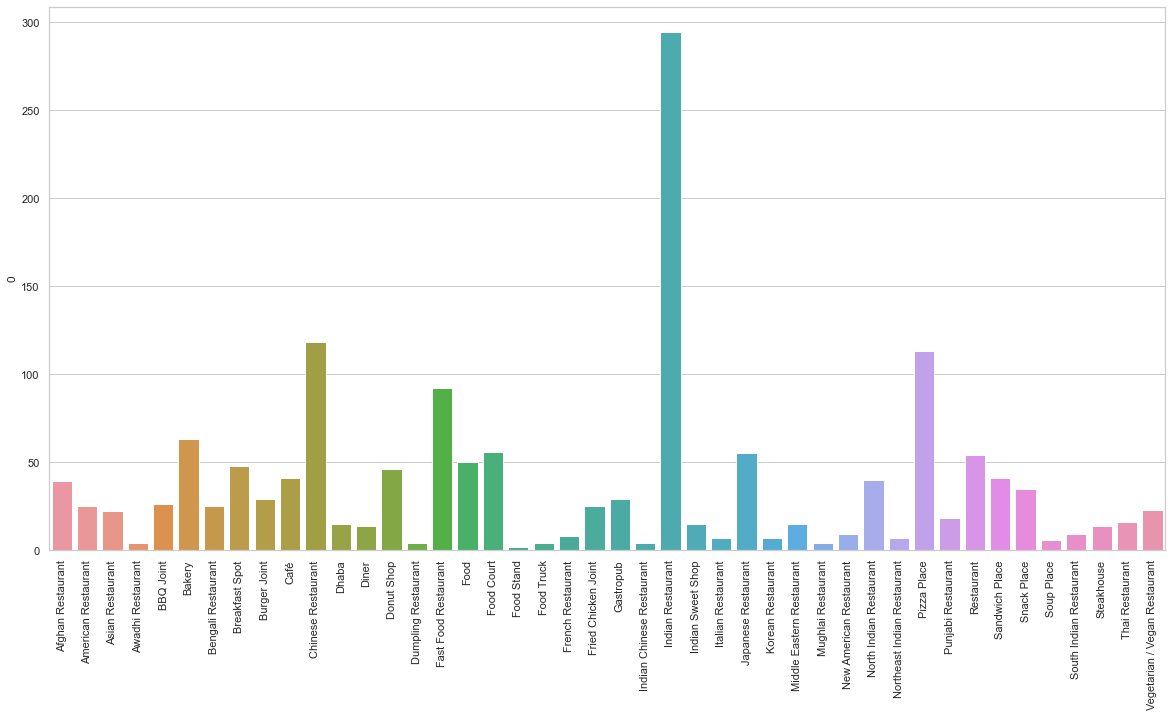

In [31]:
plot_bar(0)

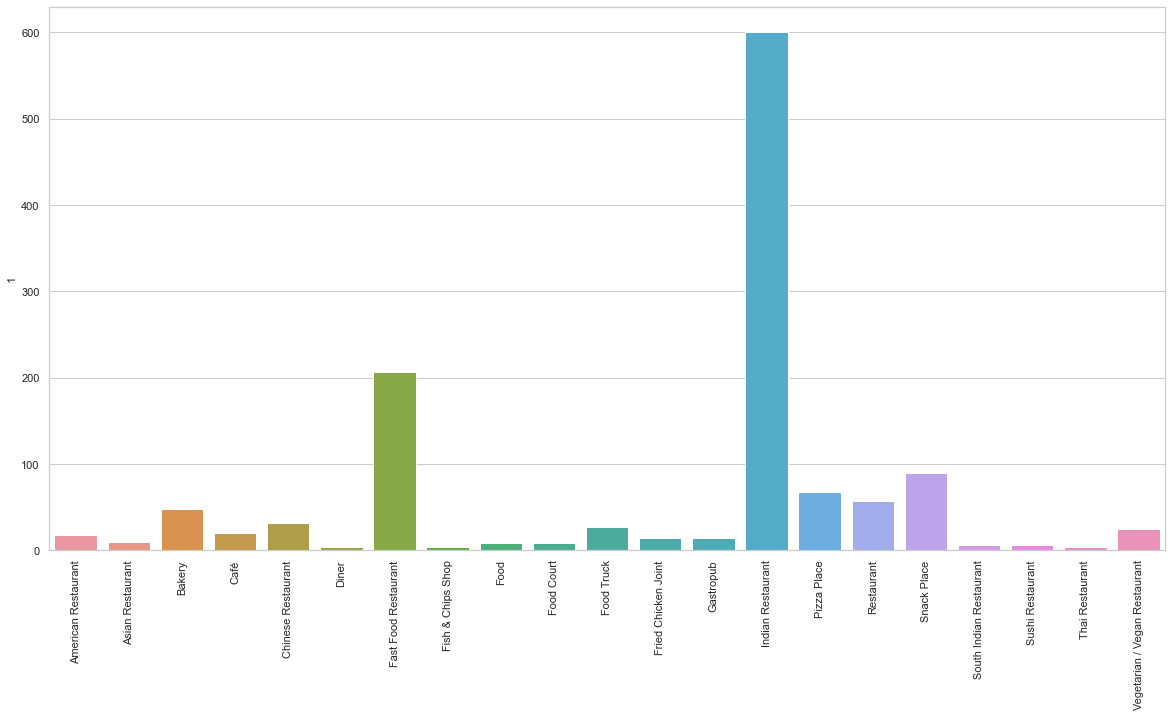

In [32]:
plot_bar(1)

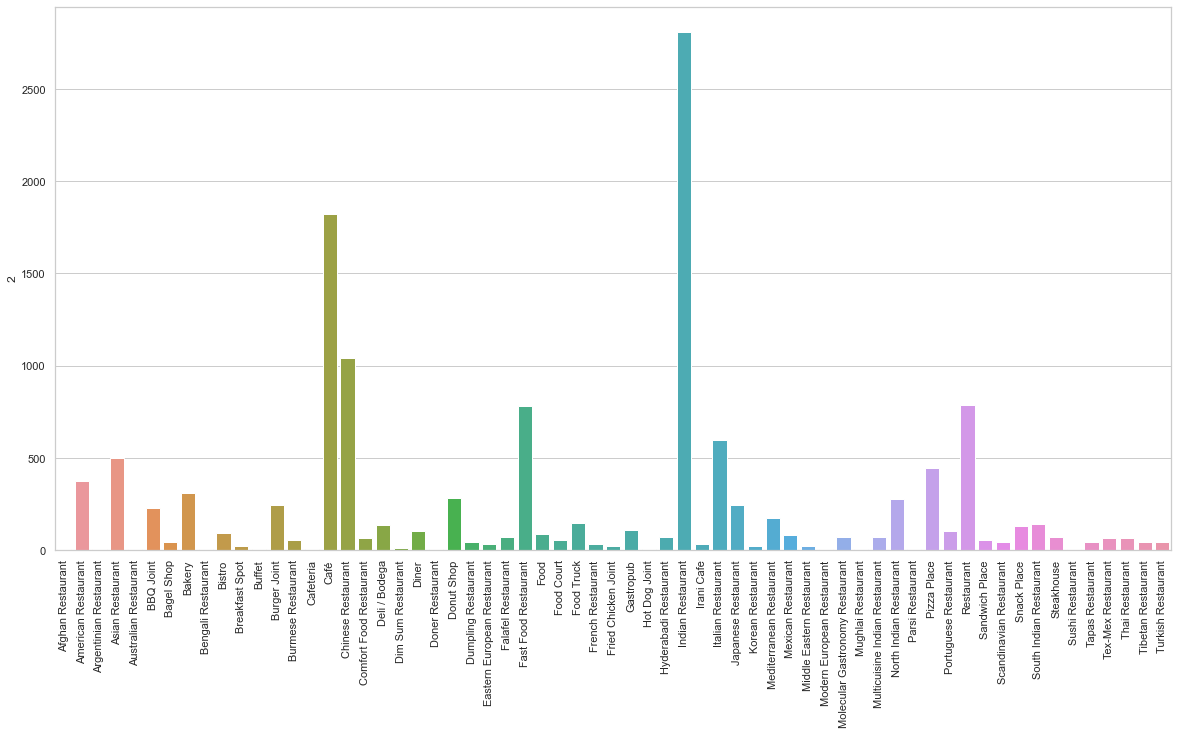

In [33]:
plot_bar(2)

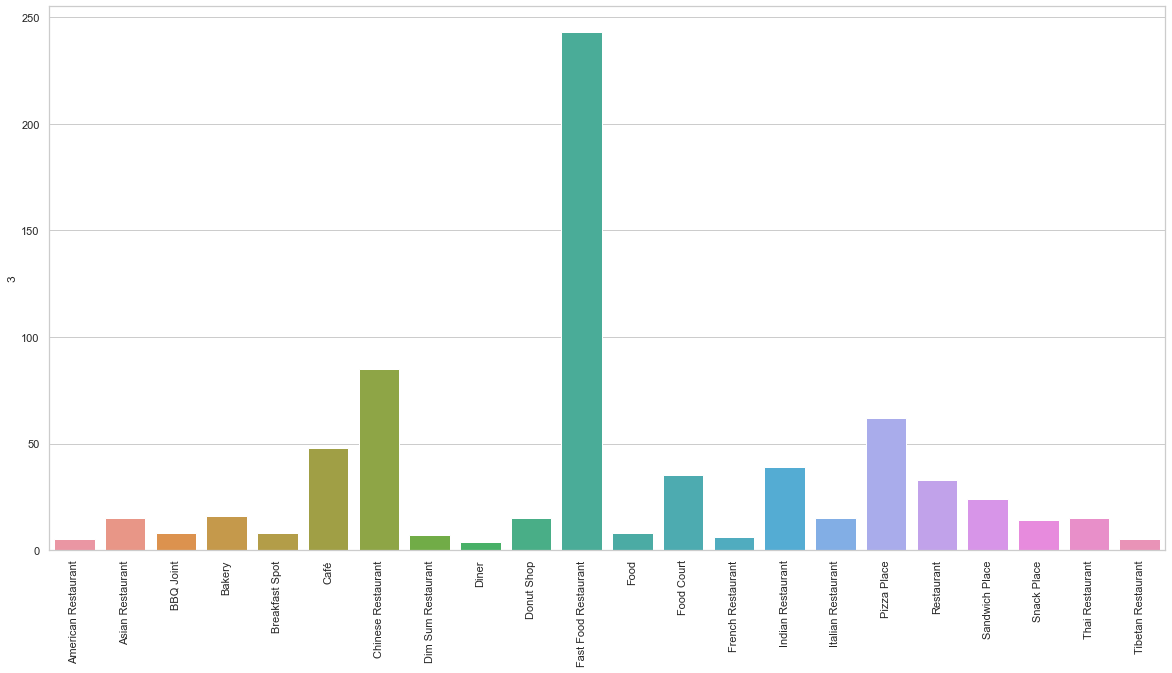

In [34]:
plot_bar(3)

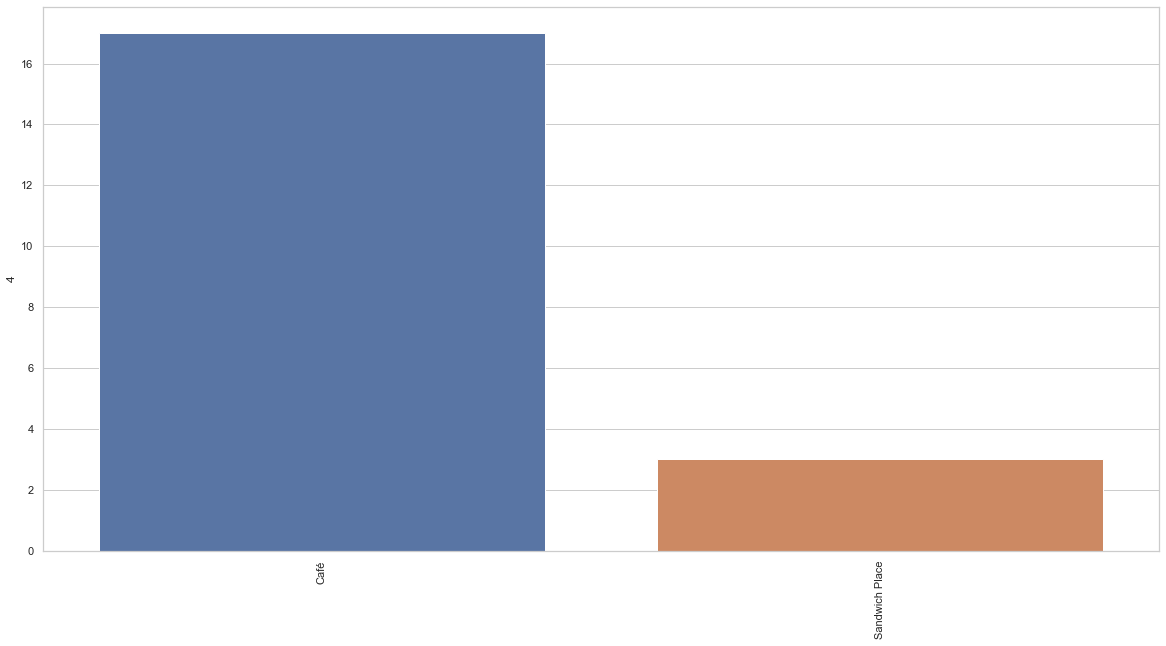

In [35]:
plot_bar(4)

<h3>Results and Discussions</h3><a class="anchor" id="results"></a>

Our Analysis was done on over 186 neighborhoods, containing over 848 restaurants within 2km radius of every neighborhood. We segragated these neighborhoods on the basis of types and amounts of restaurants. Five clusters were obtained, each having a unique collection of restaurants. Since, we were focused on finding optimal neighborhoods for opening Indian restaurants, we selected cluster 2 and 3 which had the highest number of Indian restaurants. The above actions left us with the only those neighborhoods that had a shared characteristics of and that had a high demand for Indian restaurants.

The neighborhoods recommendation obtained here are not completely accurate. This is due to the limitations in the dataset used in the project. Due to lack of cross referencing sources, we may have missed a few neighborhoods from our consideration. The foursquare API does not contain, or does not rely, a comprehensive dataset about the restaurants present in delhi. Surely, in a city like Delhi with a population of over 19 million, there are much more restaurants than 848.


<h3>Conclusion</h3><a class="anchor" id="conclusion"></a>

In this study, I analyzed the Delhi neighborhood having different types of restaurants across the state. I analyzed different clusters where Indian restaurants were present in huge numbers. 
Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.